Gráficos de dispersión

Una parte importante del análisis exploratorio de datos es desarrollar una comprensión de las relaciones entre las variables (es decir, columnas) en nuestros datos.

Podrías necesitar, por ejemplo, entender mejor la relación entre la altura y el peso, entre la temperatura y la venta de helados, la relación entre el nivel educativo y el salario, o la relación entre las horas de estudio y los puntajes de exámenes. Los gráficos de dispersión son una excelente manera de visualizar estas relaciones.

Un gráfico de dispersión es simplemente una gráfica en donde se traza un solo punto para cada conjunto de variables, pero los puntos no están conectados mediante líneas.

¡Mira el siguiente video y después vuelve a leer para saber más!

https://www.youtube.com/watch?v=ZghXsmGN70E

Para ilustrar aún mejor la utilidad de los gráficos de dispersión, examinemos un conjunto de datos de alturas y pesos de 10 000 adultos en los EE.UU. Empezaremos, como de costumbre, leyendo los datos, mostrando las primeras filas y visualizando información general sobre el conjunto de datos.

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/height_weight.csv')

print(df.head())
print()
df.info()

"""      height      weight  age  male
0  67.345391  151.163975   26     0
1  69.131220  203.525148   44     1
2  67.710271  205.752354   42     1
3  62.412362  117.148813   27     0
4  72.967492  229.394555   49     1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  10000 non-null  float64
 1   weight  10000 non-null  float64
 2   age     10000 non-null  int64  
 3   male    10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB"""

Los datos tienen cuatro columnas y 10 000 filas, sin valores ausentes. Cada fila contiene datos recopilados para un individuo único. Las columnas son:

'height': altura de la persona, en pulgadas.
'weight': peso de la persona, en libras.
'age': edad de la persona, en años.
'male': sexo de la persona, donde 1 = masculino y 0 = femenino.
Vamos a ver una descripción numérica de los datos:

In [ ]:
import pandas as pd

df = pd.read_csv('/datasets/height_weight.csv')

print(df.describe())

"""             height        weight           age          male
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      66.367560    164.157357     37.507000      0.500000
std        4.284200     33.881810      7.495236      0.500025
min       53.663133     63.700127     25.000000      0.000000
25%       63.029487    137.599803     31.000000      0.000000
50%       66.276290    163.565827     37.000000      0.500000
75%       69.676237    191.227505     44.000000      1.000000
max       79.598742    280.989699     50.000000      1.000000"""

A partir del resultado de describe(), podemos determinar que el rango de edad de los adultos en el conjunto de datos es de 25 a 50 años. Se incluye la columna 'male' en la salida porque es un tipo de datos numérico de Python, pero debemos recordar que es una variable categórica, así que no debemos dar mucha importancia a esa información.

Ahora que tenemos algunas estadísticas resumidas, vamos a usar la visualización para tener una mejor idea de los datos. Primero vamos a investigar la relación entre la altura y el peso.

Comenzaremos usando el comportamiento predeterminado del método plot() para hacer un gráfico de líneas, colocando la altura y el peso en los ejes X y Y, respectivamente:

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df.plot(x='height', y='weight')
plt.show()

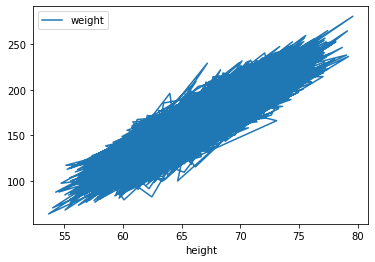

¡Vaya! ¡Qué desastre! ¿Por qué nuestro gráfico se ve así?

Por defecto, el método plot() crea un gráfico de líneas pasando en orden por cada fila del DataFrame. Para cada fila se traza un punto, y este punto se conecta con el anterior utilizando una línea.

Dado que nuestro DataFrame no está ordenado por ninguna columna en particular, los puntos están por todos lados y las líneas que los conectan no tienen sentido, causando este desorden en el gráfico.

Vamos a ordenar nuestros datos por altura y graficarlos de nuevo para averiguar si podemos mejorar la gráfica:

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df.sort_values('height').plot(x='height', y='weight')
plt.show()

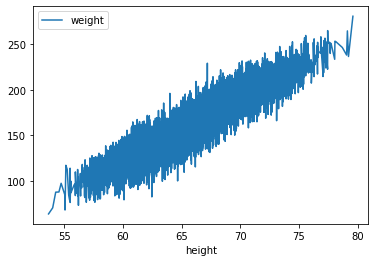

Eso es un progreso, pero conectar los puntos de datos con líneas no tiene caso, ya que la altura y peso de una persona no están relacionados con la altura y el peso de otra. Cada punto de datos representa una medición discreta e independiente.

Cuando decides qué tipo de gráfico usar para tus datos, es importante tomar en cuenta qué representa cada punto de datos y cómo se relaciona con el siguiente. Esto debe ser lo primero en lo que pienses cuando elijas una gráfica para tu presentación.

En este caso, es mejor usar puntos individuales para trazar datos discretos como estos. Y ahí es exactamente donde entran los gráficos de dispersión. Con un gráfico de dispersión no es necesario ordenar los datos, el diagrama se verá exactamente igual sin importar cómo se ordenen las filas en el DataFrame. Esto también resuelve la cuestión de la relación entre los puntos de datos, ya que no existe una relación visible embebida en el gráfico de dispersión.

En la lección anterior, aprendimos una manera indirecta de crear gráficos de dispersión al incluir ciertos argumentos para el parámetro style=.

Por ejemplo, podemos usar 'o' para hacer un gráfico de dispersión donde cada punto está marcado con un círculo:

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df.plot(x='height', y='weight', style='o')
plt.show()

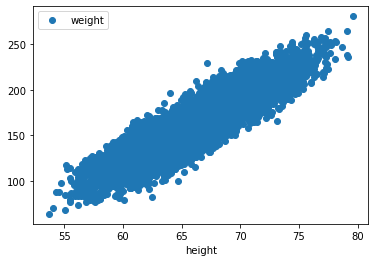

Cada punto de datos ahora se traza de manera independiente, dejando en claro que existe una relación entre el peso y la altura. El gráfico de dispersión también nos permite identificar fácilmente puntos atípicos. Sin embargo, existe una manera aún mejor de crear gráficos de dispersión utilizando pandas.

Podemos crear un gráfico de dispersión directamente usando el parámetro kind= en plot(). 

Este parámetro le dice a plot() qué tipo de gráfico crear. En este caso, usamos el argumento 'scatter' para crear un gráfico de dispersión.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df.plot(x='height', y='weight', kind='scatter')
plt.show()

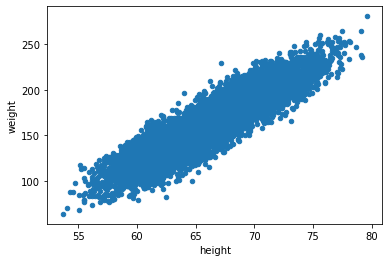

Los puntos de datos son casi idénticos en ambos gráficos. Los puntos en el segundo gráfico son ligeramente más pequeños que los del primero, pero ¿observas alguna otra diferencia entre estas dos maneras de crear un gráfico de dispersión?

Si no especificamos kind='scatter', entonces el eje Y no está etiquetado de forma predeterminada y también tenemos una leyenda innecesaria. Al crear explícitamente un gráfico de dispersión, ya está bien formateado con ejes etiquetados.

Solo nos queda una última cosa de la cual hablar sobre los gráficos de dispersión. Con tantos puntos, muchos de ellos se superponen, lo que dificulta tener una buena idea de la densidad de puntos en el gráfico anterior.

Sin embargo, podemos solucionar este problema usando el parámetro alpha=. Este parámetro rige la transparencia de los puntos y puede aceptar cualquier valor entre 0 (completamente transparente) y 1 (nada transparente). Por defecto, se establece en 1, indicando que no hay transparencia.

A medida que el valor disminuye, cada punto se hace más tenue, y es más fácil ver donde está la mayor densidad de puntos. El intercambio es que se vuelve más difícil ver los puntos en los extremos de la distribución. El mejor valor alfa para usar es realmente una cuestión de gusto y de lo que desees enfatizar con tu gráfico.

Resumen

Recapitulemos. Esto es lo que hemos visto hasta ahora:

- sort_values(): ordena los datos por la columna que se pasó.
- style='o': crea un gráfico de dispersión marcando explícitamente cada punto de datos con un círculo.
- kind='scatter': crea un gráfico de dispersión usando el método predeterminado plot.
- alpha= establece la transparencia de los puntos en el gráfico al valor especificado.

Ahora que ya entiendes las razones y métodos para crear gráficos de dispersión, ¡llegó el momento de ponerse manos a la obra!

Ejercicio

Para hacer el análisis más interesante y fácil de entender, usaremos el mismo conjunto de datos de antes, pero esta vez analizaremos height frente a age en lugar de weight. Vas a crear un gráfico de dispersión que muestre la relación entre estas dos variables.

Los datos de altura y peso del adulto se han leído en la variable df para ti en el precódigo. Utiliza el argumento kind='scatter' para crear el gráfico de dispersión deseado. Da al gráfico los siguientes argumentos:

1. El título “Adult heights” ("Altura de adultos" en Espanol) (el uso de mayúsculas y minúsculas es importante).
2. Valor alfa de 0.36.
3. Tamaño de la gráfica de 8 por 6 pulgadas.
4. Eje X etiquetado “Age / years” (“Edad / anos“ en Espanol).
5. Eje Y etiquetado “Height / inches” ("Altura / pulgadas" en Espanol).

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df.plot(x='age', y='height', kind='scatter', title='Adult heights', alpha= 0.36, figsize= [8,6], xlabel='Age / years', ylabel='Height / inches')  # escribe tu código aquí

plt.show()

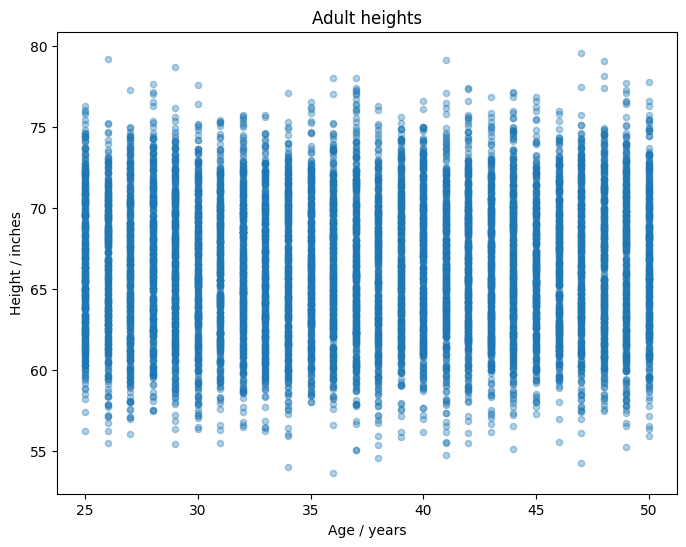